![book header](header.png)

In [1]:
import time
from pynput import keyboard
import numpy as np
import matplotlib.pyplot as plt
# from serial import Serial # Uncomment this line if you are using the real car
from KITT_Simulator.serial_simulator import Serial # Uncomment this line if you are using the simulator

# Module 2 - Reading KITT sensor data

KITT can only drive autonomously if it is able to sense its environment. Two types of sensors are provided: 
(i) Two distance sensors mounted on the front of KITT, and 
(ii) Five microphones located around the field which can record the audio transmitted by the beacon on top of KITT and send it to the PC.

The idea of this task is to understand how to read out distance sensors in front of KITT to avoid obstacles and reading information from the microphones placed in the field. 

Make sure you have KITT ready, and a laptop or lab PC with Python set up. You'll also need access to a field with microphones and an audio card.

**Preparation** (this should be converted to a check list)
- ASIO4ALL installation.
- Windows 10 users make sure that you install ASIO4ALL and make sure you use a build of PyAudio that supports ASIO ( @Mano should we mention the versions exactlly). Of course needless to say, your Python IDE needs to be ready!
- Make sure Python IDE is ready.## Preparation Checklist




## The Distance Sensors

KITT has two ultrasonic sensors on the front left and right. These ultrasonic distance sensors consists of the SRF02 module(see picture below), the datasheet of this module is also on Brightspace (@B update with links). The module works by transmitting a pulse train at 40 kHz and then listening to its echo. The time until the first echo is received is measured and converted to a distance in centimeters. According to the SRF02 datasheet, the time between two observations (the cycle period) has to be at least 66 ms. The modules are connected to the MCU, and the interface is pre-programmed. The cycle time is fixed at 70 ms, and in this period, the left and right sensors are started one after the other. The measurements are stored in a buffer on the MCU. A new measurement overwrites the older one. 

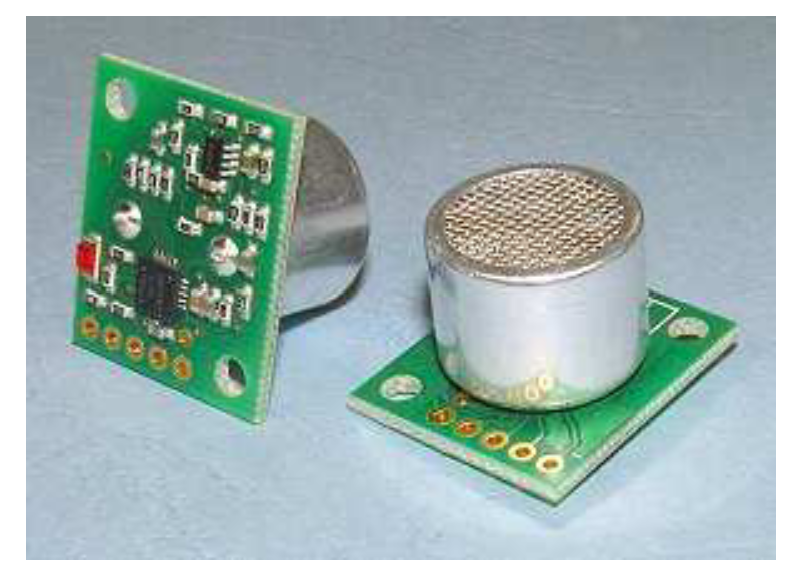

To understand the limits of the system, you need to know how the ultrasonic sensors work. The accuracy of the estimated distance is affected by many factors, such as the mounting of the sensors in combination with the type of beams they generate and the environment.  

Moreover, the distance measured by the sensors must be relayed to the computer and proccessed. The various communication delays are at the origin of additional errors. For example, once you collect the data and try to process it while KIIT is moving, the information about the obstacle and its position becomes outdated. This effect becomes more noticeable as the speed increases (why?).



## Obtaining distance measurment from the PC 

You may send a request to KITT to obatin its status . That command is called status command . Once the KIIT has recived that reuqest it would provide the following information : 

1) Distace sensors values  
2) Battery volatge level 
3) version information of KIIT





**Step 1** 

Send a stauts command  as follows : 

In [2]:
serial = Serial('/dev/ttyUSB0', 115200)
serial.write(b'S\n')
status = serial.read_until(b'\x04')
print(status)
serial.close()

Canvas(height=525, layout=Layout(height='525px', width='525px'), width=525)

**************************
* Audio Beacon: on
* c: 0xabcdef00
* f_c: 5678
* f_b: 1234
* c_r: 1337
**************************
* PWM:
* Dir. 150
* Mot. 150
**************************
* Sensors:
* Dist. L 999 R 999
* V_batt 11.5 V
**************************



In [3]:
## here the code to send status command `serial_port.write(b'S\n')`

## *The distance measurements** are included in the output of the status request command, 



##, but an isolated version containing only the distances can be obtained
##by using:

##`serial_port.write(b'Sd\n')`

##Make sure to receive the data from KITT with the following: 

##`serial_port.read_until(b'\x04')`

##Similarly, `b'Sv\n'` makes KITT send the voltage of the battery pack, and `b'V\n'` shows version information of KITT. Again the data sent by KITT should be received with, 

##`serial_port.read_until(b'\x04')`


**Step 2**

Extract and isolated distance from that info by :

In [4]:
## here comes the code to isolate the distance values

**Step 3**

Now you can also obatin and isolate the voltage level and version infromation . 

In [5]:
## here comes the voltage level and information 

## How to use distance values to model the car ? 

At first glance, ultrasonic sensors may seem useful only for detecting obstacles, but they actually serve an even more crucial purpose. To control the car autonomously, we need to understand how it responds to specific control commands (so drive and steer command). Think of it like a driver who knows how much pressing the gas pedal will accelerate the car or how much turning the steering wheel will change its direction. To understand the impact of motor forces on the car’s acceleration, we need a way to measure acceleration. However, we don’t have an accelerometer on the car—only ultrasonic sensors. Those after a bit of processing can give us distance traveled by car , and therefore we need to still convert the cars traveled distcne to speed and accelration. As a first step let breifly overview the connection displacmnet , velocity and accelration . 

The **average speed** is defined as the total distance traveled divided by the time taken:

$$
\text{Average Speed} = \frac{\text{Total Distance}}{\text{Time}}
$$

**Acceleration** is the change in speed over time:

$$
\text{Acceleration} = \frac{\text{Change in Speed}}{\text{Time}} = \frac{\Delta v}{\Delta t}
$$

When considered over very short intervals, acceleration becomes the derivative of velocity with respect to time:

$$
a(t) = \frac{dv(t)}{dt}
$$

Without diving too deep into the math, it's enough for now to know that if we can find a way to measure the distance the car travels, we can calculate its speed and acceleration. So, the key question is: how can we measure the distance traveled by the car?

If we have a known, stationary obstacle in front of KITT (like a wall), the distance measured by the sensors can be used to estimate the distance KITT has traveled. However, remember that the sensor reading doesn’t directly give the traveled distance. We also need to record the time of each measurement to calculate the distance over time.

---

Actually in Module 4, you'll get instruction to develop a car model that includes dynamics such as velocity and response to driving commands. but to build this model, you’ll need position versus time plots. Additionally, in the final challenge, you’ll need to detect obstacles in KITT’s path using the distance sensors. So it is for now imprtant to add sensor reading methods to the KITT class from Module 1. The collected data should be stored in a format that is easy to access and use later.





**Tasks**

Using the previously explained commands, have KITT transmit its various pieces of information. You can do this by adding a `read_sensors` method to the KITT class. Assign a key to show the distances measured. Display all the received data in an organized way in the terminal. (?? @Mano isn't it a task by itself? shouold we use the simulator for that?)

In [6]:
## (@Mano @Mehrdad shall we add the kitt class here again with the new methods and ask them to complete it
# lets also add an example to test it with the gui, have the car moving with keyboard and 
# then plot the measure distance vs time)

## @Mano @Mehrdad shall we add a block of code (placeholder) for each task so that they can complete it?


# I would suggest maybe a small automatic code ? Not with keyboard neccarily ? I will talk with @Mano about this

**Task 1: Static measurements** 


**step 1** Perform measurements with the vehicle at stand-still. 





In [7]:
## Perform just a signle measuremnt while standing still 

**step 2**
Introduce various obstacle configurations. 


In [8]:
## introduce obtsacles and perfrom the same code to measure 

**step 3**
Determine the accuracy of the sensors, 



In [9]:
## Accuracy of sensors ? with GUI ? 

**step 4**
their maximal range, 




In [10]:
## putting the onbstacles as far as possible ?

**step 5**
and the field of view (beam angle). 






For hints regarding this refer to the FAQ.

In [11]:
## apply the field of view formula ? so moving again the obstacles in gui ? 

**Task 2: Delay estimates**

**step 1** 
Make an estimate of the delays for getting an update on the distance 






**Step 2** 
how they impact the performance of the control chain Think for example on ... 




**Step3**
How old is an estimate by the time you receive it? Some delays you can determine from the data sheets, and some delays
you can measure using timing functions as described in Section 2.6.2 (??@B adapt to final changes).

**Task 3: Dynamic Measurements**


**Step 1** 
Perform distance measurements with KITT in motion (driving to the wall) and analyze the shape of the distance versus time. 





**Step 2** 
Is the plot continuous? 

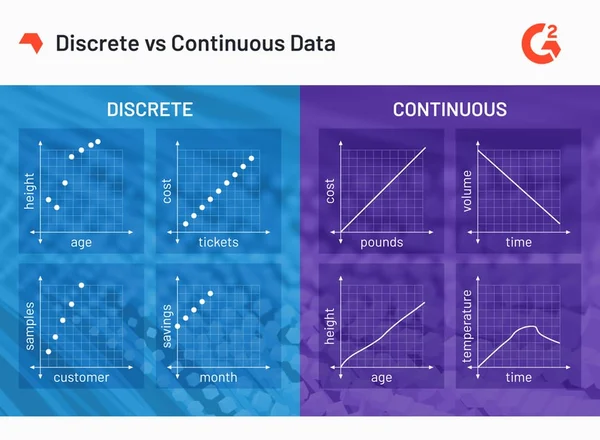


**Step 3**
Look at the plot for left and right sensor values, what do you see? Can you verify the 70 ms cycle time? 




**step4**
Can you use these plots to estimate velocity accurately?

**Task 4: Measurement Data analysis and interpretation**

**Step 1** 
Analyze the measured data with an eye on the possibility of compensating for the possible errors.



**Step 2**
 Implement some strategies to calibrate KITT.

```{note}{Bonus Tasks - Optional extension} Click to Show

Tip: It is advisable to store all the old distance data in a list inside the KITT class. This will be convenient during the final challenge, where the route planning might need old measurements to determine the position of objects. It will also help with characterizing the distance sensors. A good way of doing this is by initializing an empty list in the __init__ phase. Then, every time the sensor is read, you append this list with [time, left_dist, right_dist].

```


## Mid-term assessment 2.1 and report

After you finish this assignment, and ultimo in week 4, showcase the functionality of your script to your assigned TA. After you pass this assessment, you are ready to document your results in your midterm report. For this Module, you would include a chapter that covers the above tasks (using independently-readable text, i.e., don’t refer to “Task 1”). Include plots; for each plot it should be clear how the plot was made (i.e., the corresponding experimental set-up), and you have to describe what is seen in the plot before you discuss results and derive conclusions. Review the guidelines for more information. Include the corresponding code in an Appendix. Remember to document your code, using comments to define input/output variables of functions and to explain the logic and any modifications made. Your completed script will be crucial for the upcoming challenges, contributing to the overall autonomous driving system.

## Delay estimation code (NEW)

In [12]:
import serial
import time
import matplotlib . pyplot as plt
port = 'COM3 '
baudrate = 115200
serial = serial . Serial ( port , baudrate , rtscts = True )
elapsed_times = [] # List to store elapsed times
for _ in range (1000) :
start_time = time . time () # Record the start time
serial . write (b'S\n')
status = serial . read_until (b'\ x04 ')
end_time = time . time () # Record the end time
elapsed_time = end_time - start_time
elapsed_times . append ( elapsed_time )

IndentationError: expected an indented block after 'for' statement on line 8 (2968534848.py, line 9)

## Delay plot and statistical (NEW)

In [ ]:
plt . hist ( elapsed_times , bins =50 , color = 'skyblue ', edgecolor ='black ')
plt . xlabel ('Delay ␣ Time ␣( seconds )')
plt . ylabel ('Frequency ')
plt . title (' Distribution ␣of␣ Delay ␣ Time ␣ for ␣ Status ␣ Retrieval ')
plt . show ()

## Dynamic measurment (NEW)


In [ ]:

# A code to plot the Dynamic measuremnt

## The Microphones

Four microphones of the field are installed around its corners, and a fifth microphone is placed between two of the microphones at the edge of the field, at a level higher than the other four. These microphones, along with the beacon atop KITT, will be used to locate KITT within the field (chapter 5 ??@B update).

The appropriate sound card driver must be used to use the microphone array. The soundcard used in EPO-4 is a PreSonus AudioBox 1818VSL. On Linux, OSX (except the ARM version), and Windows 11, the sound card works out of the box. On Windows 10, it is necessary to install [ASIO4ALL](https://www.asio4all.org/) and a build of [PyAudio](https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyaudio) compiled with ASIO support. If you use the Pipfile provided on Brightspace, the correct version of PyAudio should already be installed, but you still need to install ASIO4ALL manually.

A typical laptop will have many possible audio devices, for example the built-in microphone, a Bluetooth headset, and the AudioBox 1818VSL used in EPO-4. To initialize the microphone array, the correct audio device should be specified. This short script will list the index and names of all audio devices visible to PyAudio.

In [ ]:
# (??@B change this to a better location)
%pip install -r requirements.txt
%pip install keyboard
%pip install pyaudio # @Mano @Mehrdad version

In [ ]:
import matplotlib
import numpy
import serial
import keyboard
import scipy
import statsmodels
import ipywidgets
import pyaudio
import tkinter as tk

In [ ]:

import pyaudio
pyaudio_handle = pyaudio.PyAudio()
for i in range(pyaudio_handle.get_device_count()):
    device_info = pyaudio_handle.get_device_info_by_index(i)
    print(i, device_info['name'])



```{important} Click to Show

On Windows 10, make sure to use the audio device index that has ASIO in the name. Other audio devices may be using the legacy MME or WDM Windows drivers, which may not support more than 2 synchronous
audio channels.

```

The microphone array must first be initialized. When doing so, the sampling frequency that will be used must be specified. This sampling frequency will either be 48 kHz or 44.1 kHz, depending on the type of audio device ( This should be more clear). Initializing the microphone array at device index `device_index` with a sampling frequency of `Fs` is done as, 


In [ ]:
# From the list of devices, add the desired index and the appropriate Fs value for the same.

stream = pyaudio_handle.open(input_device_index=device_index,
                            channels=5,
                            format=pyaudio.paInt16,
                            rate=Fs,
                            input=True)


To make a recording, the length of the recording must be specified. This must be specified as the number of audio frames to be recorded. The result will be a *bytes* object. Each audio frame will contain 5 samples, one for each microphone. Each sample contains 2 bytes, since we specified 16-bit audio. So, the return value of recording N frames is 10N bytes. To get a recording of N frames, one can run the
following command:


In [ ]:
samples = stream.read(N)

# To convert it into a numpy array
import numpy as np
data = np.frombuffer(samples, dtype='int16')

At this point, the microphone data is interleaved: data[0] contains the first sample of microphone 0, data[1] contains the first sample of microphone 1, data[2] contains the first sample of microphone 2, and so on until data[5] contains the second sample of microphone 0. Table 4.1 explains the concept more visually. This interleaved data stream should be deinterleaved into 5 streams, one for each microphone.

| data[0]      | data[1]      | data[2]      | data[3]      | data[4]      | data[5]      | data[6]      | data[7]      | ... |
|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|-----|
| mic 0        | mic 1        | mic 2        | mic 3        | mic 4        | mic 0        | mic 1        | mic 2        | ... |
| frame 0      | frame 0      | frame 0      | frame 0      | frame 0      | frame 1      | frame 1      | frame 1      | ... |


```{admonition} 

You may be familiar with the Matplotlib Python module, which can be used to plot the audio data received from the microphones. Matplotlib produces great-looking publication-ready figures. But drawing these plots can be slow. If you want to plot audio data in real time, consider using a more low-level GUI library such as PyGame or Pyglet and trade off beauty for speed. That said, Matplotlib supports some real-time features, such as animations. Just be aware that Matplotlib is not the only solution.

```

**Lab rules regarding the microphone array:** Many groups will be using the same setup, and to avoid
making other groups crazy (?), you are not allowed to rearrange the microphone connectors. Please also
don’t touch the volume settings. If these need to be adjusted, contact a TA.




## Microphone Recording Assignment 

The final part of communicating with KITT is using the 5 microphones. This will form an important part of the final challenge, a good implementation is thus essential. Again, you should add a method like `record` into the KITT class, with an input N. This should turn on the beacon, make a recording of N sec, deconvolve the recording into its separate channels, store it for later processing, and turn off the beacon. Make a function to visualize the recordings; this will prove valuable in debugging. (?? @Mano already include this in the the kitt class, encomment and complete? also add the simulator to check? both functions)

### Assignment


**Task 1** 

**Step 1** Initialize the microphone array and record one of your team members clapping near the microphones one after another. 



**Step 2** Separate the data stream of each microphone from the interleaved data. 



**Step 3** Plot the data of all five channels, and identify which channel of your recording represents which microphone.

In [ ]:
## @MANO and @Mehrdad, shall we add a block of code here so that they can complete for recording the sound?
# should we also add the functions to kitt class and provide the structure here?
# we can also organixe the codes from other parts together and organize them.

**Task 2**

**Step 1** Turn on KITT’s beacon and record your results. Can you see the waveform of the transmission?




**Step 2** Compare the waveform of the recording to an ideal OOK of your code. 




**Step 3** What can you see and what do you infer from this?



**Task 3**

Repeat the setup of Task 2, putting KITT nearer to one microphone than to others. Can you derive from the waveforms near which microphone KITT was placed? Show the plots you made and discuss your results and conclusions derived from them.




*Bonus Tasks - Optional*

- See if you can automate selecting the correct PyAudio device index. The correct device index changes from one computer to another and can sometimes even change on the same computer after a reboot. So, it is worth your time to make a program that can automatically select the right device index.
- Implement start-up sanity checks: some process which you can run after you arrive at the test field, so that you can quickly check the microphone connections and audio levels.
- Explore PyAudio’s callback mode. This manual describes what is called ‘blocking mode’. The stream.read() function will block your program until the requested number of frames has been received from the sound card. You can instead specify a callback function to process new audio frames as they arrive. If done carefully, this will allow your program to respond faster to new microphone samples, and enable you to drive while recording. You can read more about call-back mode in the official [PyAudio documentation](https://people.csail.mit.edu/hubert/pyaudio/docs/)




### Mid-term assessment 2.2 and report

After you finish this assignment, and ultimo in week 4, showcase the functionality of your script to your
assigned TA. After you pass this assessment, you are ready to document your results in your midterm
report.

For this Module, you would include a chapter that covers the above tasks (using independently-readable
text, i.e., don’t refer to “Task 1”). Include plots; for each plot it should be clear how the plot was made
(i.e., the corresponding experimental set-up), and you have to describe what is seen in the plot before
you discuss results and derive any conclusions. Be sure to answer the questions posed along with the
plots (using independently-readable text).

Include the corresponding code in an Appendix. Remember to document your code, using comments
to define input/output variables of functions and to explain the logic and any modifications made. Your
completed script will be crucial for the upcoming challenges, contributing to the overall autonomous
driving system.

This concludes the mid-term assignments related to communication with KITT. After the mid-term, you
must integrate this module with the localization module created by your colleagues. Take into account
that integrating is often harder than originally anticipated, e.g. your code has to run in parallel, and you
have to worry about timing aspects. Hopefully, using the KITT class will provide you with a sturdy and
flexible framework to continue your work towards the final challenge


FAQ



**What is the beam angel ?**

The beam angle of a sensor refers to how wide the sensor's detection area is. It determines how much space the sensor can cover when it sends out signals (like sound or light) to detect objects.

To determine the beam angle of ultrasonic sensors mounted in front of the car, you have multiple options: 

1. **Check the Sensor Datasheet**: The easiest way or at least a way to get some idea to determine the beam angle is to refer to the manufacturer's datasheet for your specific ultrasonic sensor. The datasheet will typically provide the beam angle, often around 15 to 30 degrees for common ultrasonic sensors. But keep in mind that is for a single sensor and not the current set up ! 

2. **Experimental Determination for KIIT**:
   - **Measure Detection Width**: Place a flat object (like a wall) at a fixed distance in front of the sensor (e.g., 1 meter).
   - **Move the Object**: Move the object left and right to determine the points where the sensor stops detecting the object.
   - **Calculate the Angle**: Measure the distance between these two points (detection width) and the distance from the sensor to the object. You may use the following formula:

   
     $$\
     \text{Beam Angle} = 2 \times \arctan\left(\frac{\text{Detection Width}/2}{\text{Distance to Object}}\right)
     \
   - This calculation will give you the beam angle in degrees.$$


   **Here comes a picture** 


**I see random numbers from sensors for large distances is my sensor damaged ?**

During experiments, you may occasionally receive random or unexpected data from the sensors. This can occur not only when the sensors are operating outside their effective range but also at times when they are within range. Several factors (consider what they might be?) can cause ultrasonic sensors to produce inaccurate readings. Additionally, since there are two sensors—one on the left and one on the right—they might produce different, completly different readings.


**Are the measuremnts done from ultra sonic sesnors on the left and the right side excatly at the same time ?**

If you closely observe the blinking of the small LEDs on the Ultrasonic board on the car, you might notice that they turn on and off alternately. This indicates a slight time difference in the sensor measurements. While you don't necessarily need to account for this, as other sources of inaccuracy are more apparent, this delay is also noticeable and can be measured.

**When I try to plot the distance it seems that numbers on the axis of the plot are not in order or I have some distances shown two times . There is nothing wrong with my plots and the python code runs. What could be the issue ?**

If you notice that some numbers are repeated or that the sequence of numbers on the axis seems incorrect, review your data extraction process. Ensure that you are printing the numbers as floats rather than characters!